In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load dataset
print("Loading dataset...")
df = pd.read_csv('Practice-1 Manufacturing.csv')
print("Dataset loaded. Shape:", df.shape)
print(df.head())

Loading dataset...
Dataset loaded. Shape: (3957, 6)
   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  Quality Rating  
0            44522.217074                    9.229576e+06       99.999971  
1            63020.764997                    1.435537e+07       99.985703  
2            49125.950249                    1.072839e+07       99.999758  
3            57128.881547                    9.125702e+06       99.999975  
4            38068.201283                    6.303792e+06      100.000000  


In [3]:
# Calculate Variance Inflation Factor (VIF)
def calc_vif(X):
    print("Calculating VIF...")
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Feature"] = X.columns
    print("VIF calculation completed.")
    return vif

x = df.drop(columns=['Quality Rating'], errors='ignore')
print(calc_vif(x))

Calculating VIF...
VIF calculation completed.
          VIF                         Feature
0  113.050204                Temperature (°C)
1   49.349434                  Pressure (kPa)
2   72.745768          Temperature x Pressure
3  764.593283          Material Fusion Metric
4  219.003134  Material Transformation Metric


In [4]:
y = df['Quality Rating']

In [5]:
# Train-Test Split
print("Splitting dataset into train and test sets...")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Data split completed.")

Splitting dataset into train and test sets...
Data split completed.


In [6]:
# Feature Scaling
print("Applying feature scaling...")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print("Feature scaling applied.")

Applying feature scaling...
Feature scaling applied.


In [7]:
# Polynomial Features
print("Generating polynomial features...")
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
print("Polynomial features generated. Train shape:", x_train_poly.shape, "Test shape:", x_test_poly.shape)

Generating polynomial features...
Polynomial features generated. Train shape: (3165, 56) Test shape: (792, 56)


In [8]:
# Model Training (Using Ridge to handle multicollinearity)
print("Training Ridge regression model...")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_poly, y_train)
print("Model training completed.")

Training Ridge regression model...
Model training completed.


In [9]:
# Predictions
print("Making predictions...")
y_pred = ridge_model.predict(x_test_poly)
print("Predictions completed.")

Making predictions...
Predictions completed.


In [10]:
# Model Evaluation
print("Evaluating model...")
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(meanSqErr)
r2_score = metrics.r2_score(y_test, y_pred)

Evaluating model...


In [11]:
print(f'R squared: {r2_score:.2f}')
print(f'Mean Absolute Error: {meanAbErr}')
print(f'Mean Squared Error: {meanSqErr}')
print(f'Root Mean Squared Error: {rootMeanSqErr}')

R squared: 0.95
Mean Absolute Error: 1.9300308584296137
Mean Squared Error: 10.020703091313298
Root Mean Squared Error: 3.1655494138163913


In [12]:
# Cross-validation scores
print("Performing cross-validation...")
cv_scores = cross_val_score(ridge_model, x_train_poly, y_train, cv=5, scoring='r2')
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Average CV R² score: {np.mean(cv_scores):.2f}')

Performing cross-validation...
Cross-validation R² scores: [0.94976985 0.94767549 0.9506545  0.94825762 0.95056513]
Average CV R² score: 0.95


Plotting residual distribution...


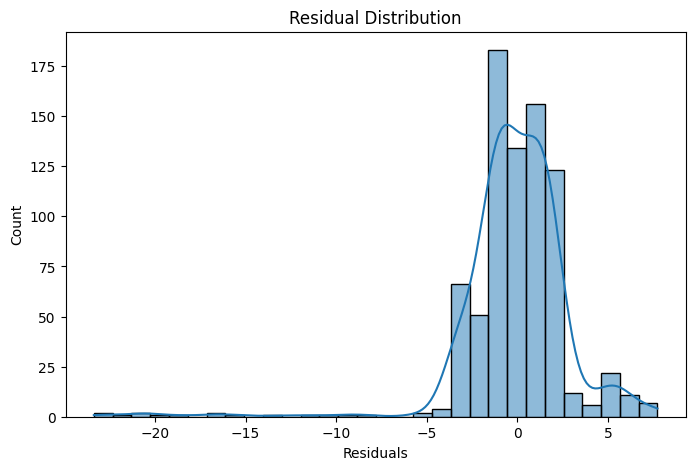

In [13]:
# Residual Plot
print("Plotting residual distribution...")
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

Plotting actual vs predicted values...


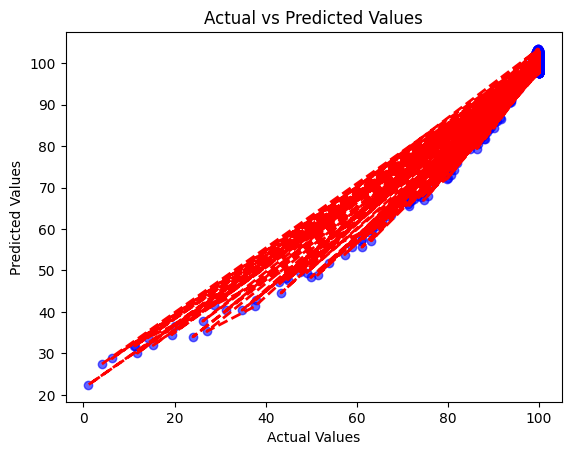

Visualization completed.


In [19]:
# Scatter Plot - Actual vs Predicted
print("Plotting actual vs predicted values...")
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot(y_test, y_pred, color='red', linewidth=2, linestyle='--')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
print("Visualization completed.")


In [22]:
sorted_idx = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

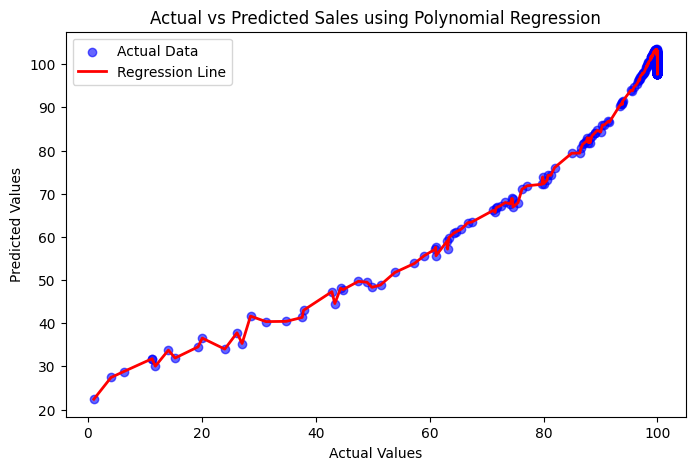

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Actual Data")
plt.plot(y_test_sorted, y_pred_sorted, color='red', linewidth=2, label="Regression Line")
plt.title("Actual vs Predicted Sales using Polynomial Regression")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [25]:
x_poly = poly.transform(scaler.transform(x))

In [26]:
y_full_pred = ridge_model.predict(x_poly)

Plotting regression line for whole dataset...


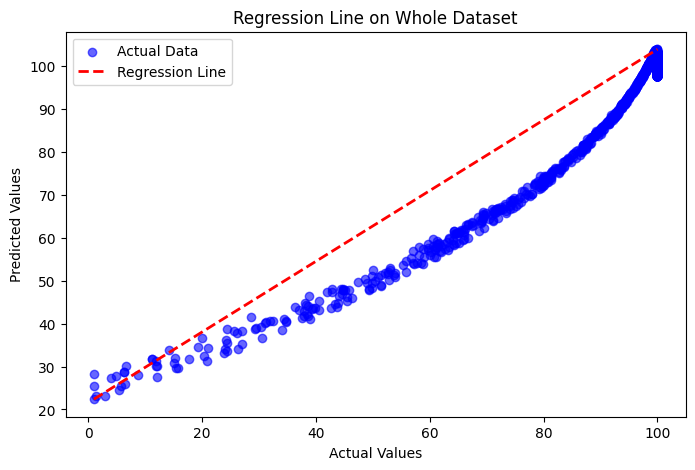

Visualization completed.


In [27]:
# Regression Line on Whole Data
print("Plotting regression line for whole dataset...")
plt.figure(figsize=(8, 5))
plt.scatter(y, y_full_pred, color='blue', alpha=0.6, label="Actual Data")
plt.plot([min(y), max(y)], [min(y_full_pred), max(y_full_pred)], color='red', linewidth=2, linestyle='--', label="Regression Line")
plt.title("Regression Line on Whole Dataset")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()
print("Visualization completed.")